In [75]:
from matplotlib import rcParams
from matplotlib import pyplot as plt
from sklearn.manifold import MDS
from sklearn.manifold import TSNE
from sklearn.decomposition import NMF
from sklearn.decomposition import KernelPCA
from sklearn.preprocessing import MinMaxScaler
from Preprocessing import optimalClusterCount
from sklearn.manifold import Isomap
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from DataGenerator import generateOneClusterData
from Settings import (DEFAULT_NUMBER_OF_FEATURES,
                        DEFAULT_NUMBER_OF_RECORDS_PER_CLASS,
                        DEFAULT_FEATURE_MEAN_RANGE,
                        DEFAULT_RANDOM_NUMBER_SEED)

data = generateOneClusterData(DEFAULT_NUMBER_OF_FEATURES,
                            DEFAULT_NUMBER_OF_RECORDS_PER_CLASS,
                            DEFAULT_FEATURE_MEAN_RANGE, 
                            DEFAULT_RANDOM_NUMBER_SEED, distribution="uniform")

data_gaussian = generateOneClusterData(DEFAULT_NUMBER_OF_FEATURES,
                            DEFAULT_NUMBER_OF_RECORDS_PER_CLASS,
                            DEFAULT_FEATURE_MEAN_RANGE, 
                            DEFAULT_RANDOM_NUMBER_SEED)

rcParams['figure.figsize'] = (6.0, 6.0)
from gap_statistic import OptimalK
optimalK = OptimalK(parallel_backend='joblib')

cluster_point_size = 3

perplexity_range = [1,30, 100, 200]
cluster_arr = range(1,50)

In [76]:
def tsne(data):
    for p in perplexity_range:
        X_embedded = TSNE(n_components=2, perplexity=p).fit_transform(data)
        X_embedded.shape
        data.shape
        plt.scatter(X_embedded[:,0], X_embedded[:,1], s=cluster_point_size)
        optK = optimalK(X_embedded, cluster_array=cluster_arr)
        plt.title("Perplexity: {}, Optimal K: {}".format(p, optK))
        plt.show()

In [77]:
def kernel_pca(data):
    X_kernel_pca = KernelPCA(n_components=2).fit_transform(data)
    plt.scatter(X_kernel_pca[:,0], X_kernel_pca[:,1], s=cluster_point_size)
    optK = optimalK(X_kernel_pca, cluster_array=cluster_arr)
    plt.title("Kernel PCA Linear, Optimal K: {}".format(optK))
    plt.show()

    X_kernel_pca_poly = KernelPCA(n_components=2, kernel="poly").fit_transform(data)
    plt.scatter(X_kernel_pca_poly[:,0],  X_kernel_pca_poly[:,1], s=cluster_point_size)
    optK = optimalK(X_kernel_pca_poly, cluster_array=cluster_arr)
    plt.title("Kernel PCA Poly, Optimal K: {}".format(optK))
    plt.show()

    X_kernel_pca_sigmoid = KernelPCA(n_components=2, kernel="sigmoid").fit_transform(data)
    plt.scatter(X_kernel_pca_sigmoid[:,0],  X_kernel_pca_sigmoid[:,1], s=cluster_point_size)
    optK = optimalK(X_kernel_pca_sigmoid, cluster_array=cluster_arr)
    plt.title("Kernel PCA Sigmoid, Optimal K: {}".format(optK))
    plt.show()

    X_kernel_pca_cos = KernelPCA(n_components=2, kernel="cosine").fit_transform(data)
    optK = optimalK(X_kernel_pca_cos, cluster_array=cluster_arr)
    plt.scatter(X_kernel_pca_cos[:,0],  X_kernel_pca_cos[:,1], s=cluster_point_size)
    plt.title("Kernel PCA Cosine, Optimal K: {}".format(optK))
    plt.show()

In [78]:
def nmf(data):
    scaler = MinMaxScaler(feature_range=(0, 1))
    rescaledData = scaler.fit_transform(data)
    model = NMF(n_components=2, init='nndsvd', random_state=0)
    W = model.fit_transform(rescaledData)
    plt.scatter(W[:,0],W[:,1], s=cluster_point_size)
    optK = optimalK(X_kernel_pca_poly, cluster_array=cluster_arr)
    plt.title("NMF, Optimal K: {}".format(optK))
    plt.show()

In [79]:
def iso(data):
    embedding = Isomap(n_components=2)
    X_iso = embedding.fit_transform(data)
    plt.scatter(X_iso[:,0], X_iso[:,1], s=cluster_point_size)
    optK = optimalK(X_iso, cluster_array=cluster_arr)
    plt.title("Iso, Optimal K: {}".format(optK))
    plt.show()

## t-SNE (Uniform)

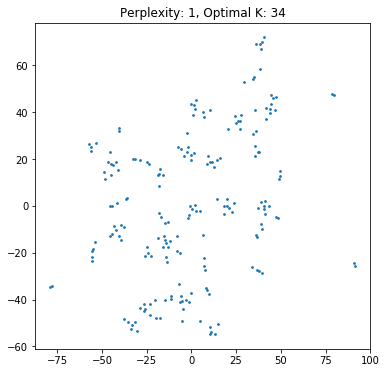

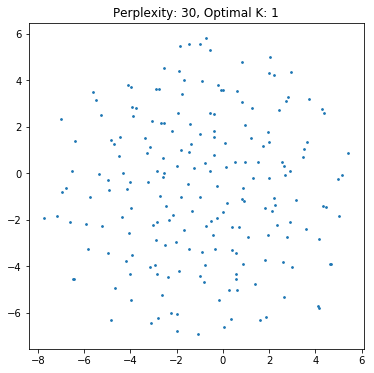

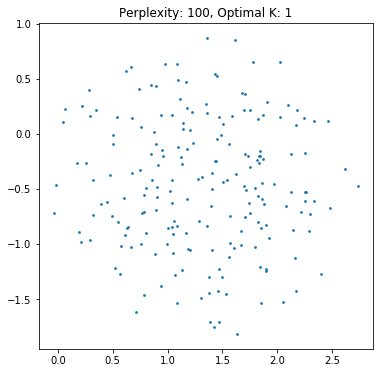

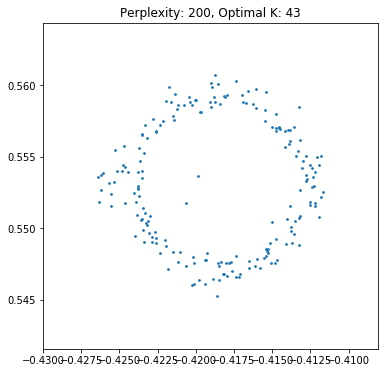

In [80]:
tsne(data)

## t-SNE (Gaussian)

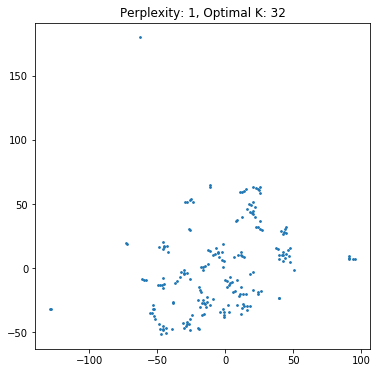

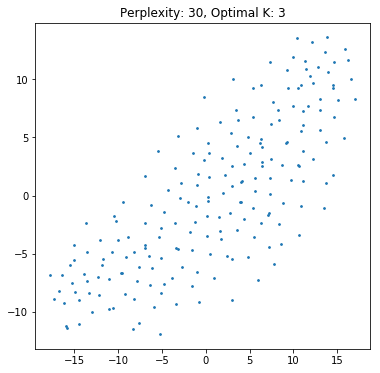

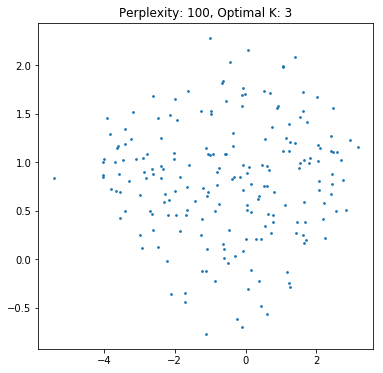

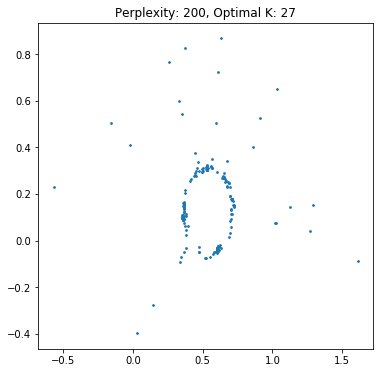

In [81]:
tsne(data_gaussian)

## Kernel PCA (Uniform)

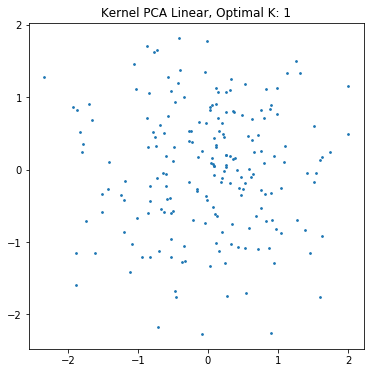

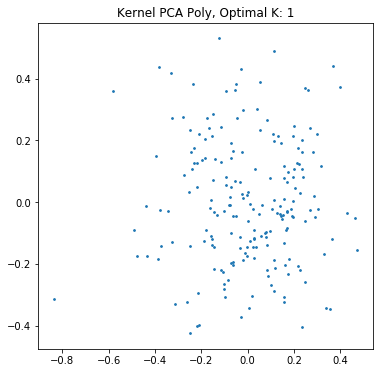

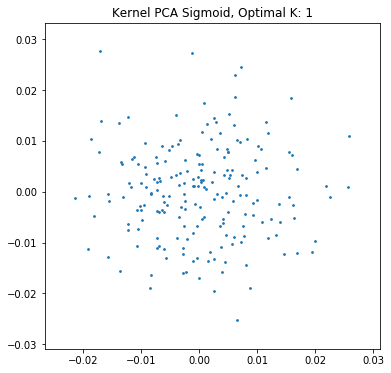

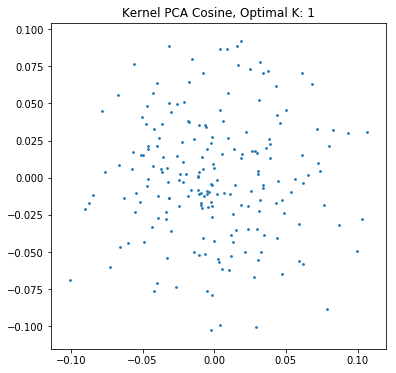

In [82]:
kernel_pca(data)

## Kernel PCA (Gaussian)

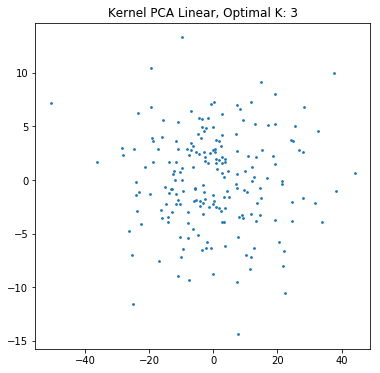

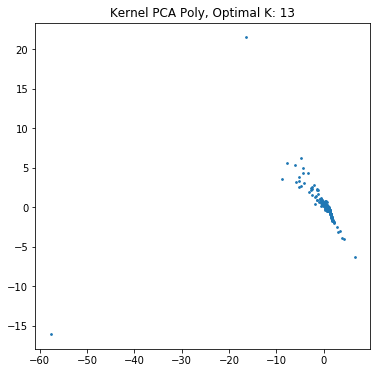

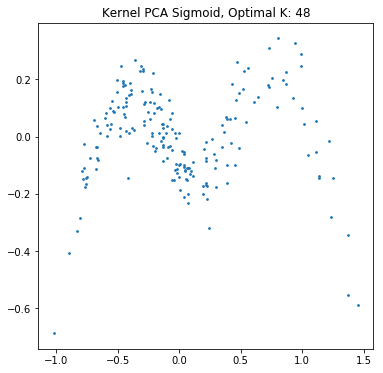

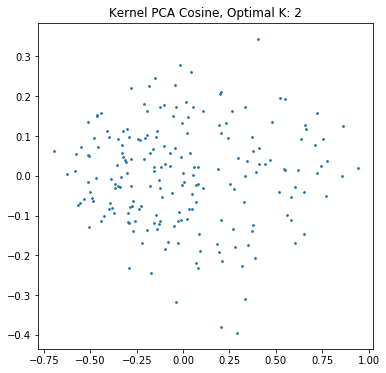

In [83]:
kernel_pca(data_gaussian)

## Non-negative matrix factorization (Uniform)

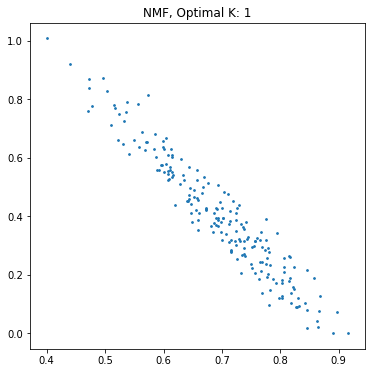

In [84]:
nmf(data)

## Non-negative matrix factorization (Gaussian)

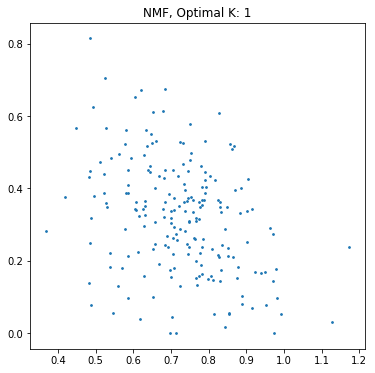

In [85]:
nmf(data_gaussian)

## Isomap (Uniform)

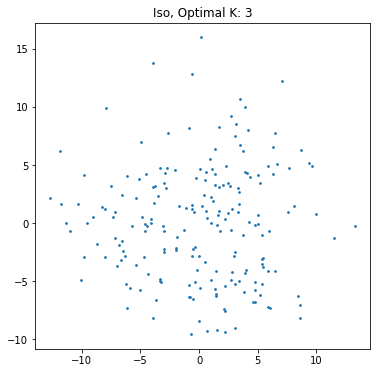

In [86]:
iso(data)

## Isomap (Gaussian)

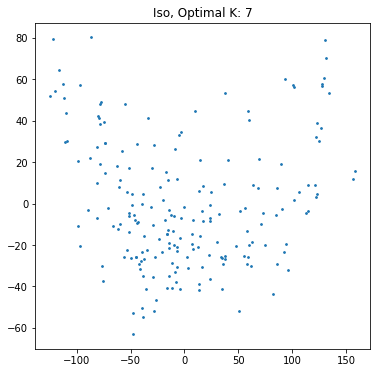

In [87]:
iso(data_gaussian)